In [1]:
import rdkit

In [3]:
from rdkit import Chem
#from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
#IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs
#IPythonConsole.molSize = 350,350


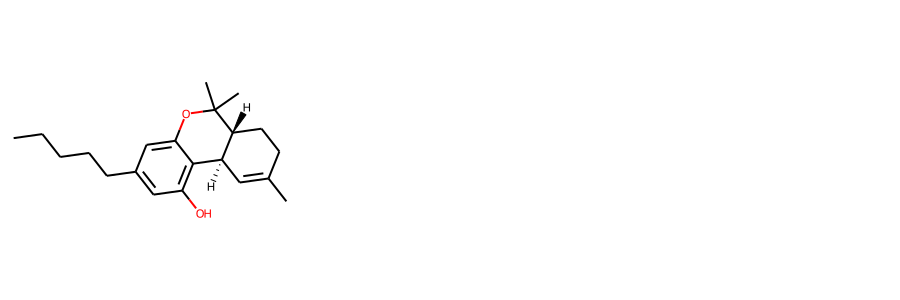

In [25]:

mol1 = Chem.MolFromSmiles("CCCCCc1cc(c2c(c1)OC([C@H]3[C@H]2C=C(CC3)C)(C)C)O")
# Default
Draw.MolsToGridImage([mol1],subImgSize=(300,300),returnPNG=False)

In [26]:
mol2 = Chem.MolFromSmiles("c1ccccc1")
mol2 = Chem.AddHs(mol2)
for atom in mol2.GetAtoms():
    atom.SetProp("atomLabel", atom.GetSymbol())
mol2
img=Draw.MolsToGridImage([mol1,mol2],subImgSize=(300,300),returnPNG=False,molsPerRow=2)
img.save('Skeletal_Lewis_examples.png')

In [5]:
SMILES_list = [#"CC=O","ClC(=O)C","ClCCl","COC",
                  "c1cnccn1","O=C1C=CNC(=O)N1","c1ccoc1","c1cnccc1C(=O)O","c1ccccc1","C=C1\C=C/C=C1",
                   "O=S(=O)(N)c1c(Cl)cc2c(c1)S(=O)(=O)NCN2","o2c1ccccc1cc2","c1ccc2ccccn12","CN1C=NC2=C1C(=O)N(C(=O)N2C)C",
                   "Oc1ccccc1","c1cc(ccc1C(=O)O)O"]
mols = [Chem.MolFromSmiles(SMILES) for SMILES in SMILES_list] 

In [9]:
#mols = [Chem.MolFromSmiles("C1CC2=C3C(=CC=C2)C(=CN3C1)[C@H]4[C@@H](C(=O)NC4=O)C5=CNC6=CC=CC=C65"),Chem.MolFromSmiles("CCCCCc1cc(c2c(c1)OC([C@H]3[C@H]2C=C(CC3)C)(C)C)O")]
img=Draw.MolsToGridImage(mols,molsPerRow=4,subImgSize=(300,300),legends=SMILES_list,returnPNG=False)

In [10]:
img.save('SMILES_examples.png')

In [2]:
rdkit.__version__

'2022.03.1'

In [28]:
import igraph as ig

In [30]:
g = ig.Graph(edges=[[0, 3], [1, 3], [2,3], [3,4], [4,5]])

In [47]:
layout = g.layout("kamada_kawai")
layout.scale(1.0)
print(layout.coords)

[[0.9858227933601457, -0.018964806169217682], [0.3744121156121141, 1.0013879707035074], [-0.7332413867243679, 0.5677446554109582], [0.08445766037718885, 0.15181871966772245], [-0.20594857468782793, -0.6990742504727506], [-0.47800479838292986, -1.4962015166049638]]


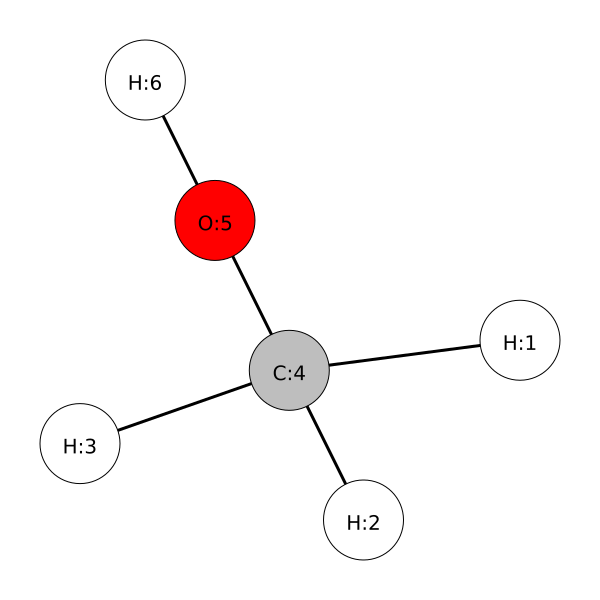

In [164]:
ig.plot(g,
        vertex_size=80,
        vertex_color=['white', 'white', 'white', 'grey', 'red', 'white'],
        vertex_label=['H:1', 'H:2', 'H:3', 'C:4','O:5','H:6'],
        vertex_label_size=20,
        edge_width=3,
        edge_color=['black'],
        margin=80,
        target='methanol_graph.png',
        layout=layout)

In [52]:
import matplotlib.pyplot as plt


In [158]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

cm = plt.get_cmap('viridis')

def make_vector(n=4,com=[0.0,0.0]):
    l = float(n)
    l0 = com[0] - 0.5*l #+ 0.5
    elements = [Rectangle((-0.5,l0+float(i)),1.,1.) for i in range(n)]
    return elements

def make_matrix(n=4,m=4,com=[0.0,0.0]):
    ln = float(n)
    lm = float(m)
    ln0 = com[1] + 0.5*ln
    lm0 = com[0] - 0.5*lm
    elements = [Rectangle((lm0+float(j),ln0-float(i)),1.,1.) for j in range(m) for i in range(n)]
    indices = [[i,j] for j in range(m) for i in range(n)]
    return elements,indices

def plot_objects(objects=[np.random.random((4,4))],figsize=None,filename=None):
    if figsize == None:
        fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
    else:
        fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'},figsize=figsize)
    coms = []
    lx   = 0.0
    ly   = 0.0
    for obj in objects:
        if len(obj.shape) == 2:
            n,m = obj.shape
        elif len(obj.shape) == 1:
            n = obj.shape[0]
            m = 1
            obj = obj.reshape((n,m))
        obj += np.min(obj) #.min()
        obj = (1./np.max(obj))*obj 
        com_x = lx + 0.5*float(m)
        lx += float(m)+2.0
        ly = max([ly,float(n)])
        elements,indices = make_matrix(n,m,[com_x,0.0])
        for i,e in enumerate(elements):
            ax.add_artist(e)
            e.set_clip_box(ax.bbox)
            e.set_alpha(0.5)
            e.set_edgecolor('k')
            e.set_facecolor(cm(float(obj[indices[i][0],indices[i][1]])))
    lx += 2.
    lfig = max(lx,ly)
    ax.set_xlim(-0.2*lx,1.2*lx)
    ax.set_ylim(-0.7*ly,0.7*ly)
    ax.axis("off")
    if filename==None:
        plt.show()
    else:
        plt.savefig(filename,bbox_inches='tight')
        plt.show()

"""
def plot_objects_old(objects=[(4,1),(4,16)]):
    fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
    coms = []
    lx   = 0.0
    ly   = 0.0
    for obj in objects:
        n,m = obj
        com_x = lx + 0.5*float(m)
        lx += float(m)+2.0
        ly = max([ly,float(n)])
        elements = make_matrix(n,m,[com_x,0.0])
        for e in elements:
            ax.add_artist(e)
            e.set_clip_box(ax.bbox)
            e.set_alpha(0.5)
            e.set_edgecolor('k')
            #e.set_facecolor(np.random.rand(3))
    lx += 2.
    lfig = max(lx,ly)
    ax.set_xlim(-0.2*lfig,1.2*lfig)
    ax.set_ylim(-0.7*lfig,0.7*lfig)
    ax.axis("off")
    plt.show()
"""

def plot_vector(n=4,com=[0.0,0.0]):
    l = float(n)
    lfig = 1.2*l
    fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
    elements = make_vector(n=n,com=com)
    for e in elements:
        ax.add_artist(e)
        e.set_clip_box(ax.bbox)
        e.set_alpha(0.5)
        e.set_edgecolor('k')
        #e.set_facecolor(np.random.rand(3))

    ax.set_ylim(-0.5*lfig, 0.5*lfig)
    ax.set_xlim(-0.5*lfig, 0.5*lfig)
    plt.show()

def plot_matrix(n=4,m=4,com=[0.0,0.0]):
    ln = float(n)
    lm = float(m)
    l = 1.2*max(ln,lm)
    fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
    elements = make_matrix(n=n,m=m,com=com)
    for e in elements:
        ax.add_artist(e)
        e.set_clip_box(ax.bbox)
        e.set_alpha(0.5)
        e.set_edgecolor('k')
        #e.set_facecolor(np.random.rand(3))
    ax.set_ylim(-0.5*l, 0.5*l)
    ax.set_xlim(-0.5*l, 0.5*l)
    plt.show()



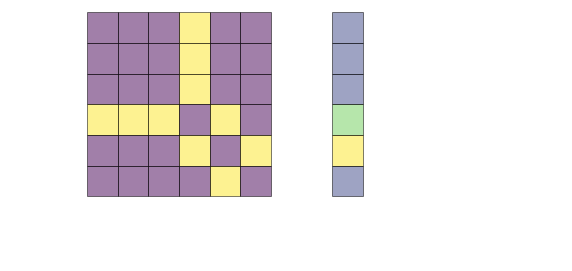

In [160]:
#plot_objects([np.array(g.get_adjacency())])
A = np.array(g.get_adjacency().data)

v = np.array([1,1,1,6,8,1])
plot_objects([A,v],figsize=(10,10),filename='Adjacency_Matrix.png')


In [66]:
cm = plt.get_cmap('viridis')

In [82]:
print(cm(0))
print(cm(1))

(0.267004, 0.004874, 0.329415, 1.0)
(0.26851, 0.009605, 0.335427, 1.0)
